# *Pneumonia Detection Using CNN*

---



---



#Objective
This project is to build and evaluate a Convolutional Neural Network (CNN) model that can accurately detect pneumonia from chest X-ray images. By applying deep learning techniques, the model is designed to automate the diagnostic process and support healthcare professionals in identifying pneumonia cases more efficiently. Using a publicly available dataset of chest X-ray images, the project demonstrates how CNNs can be effectively trained to distinguish between normal lungs and those affected by pneumonia, achieving a high classification accuracy of 92.6%. This work highlights the potential of artificial intelligence in medical imaging and early disease detection.

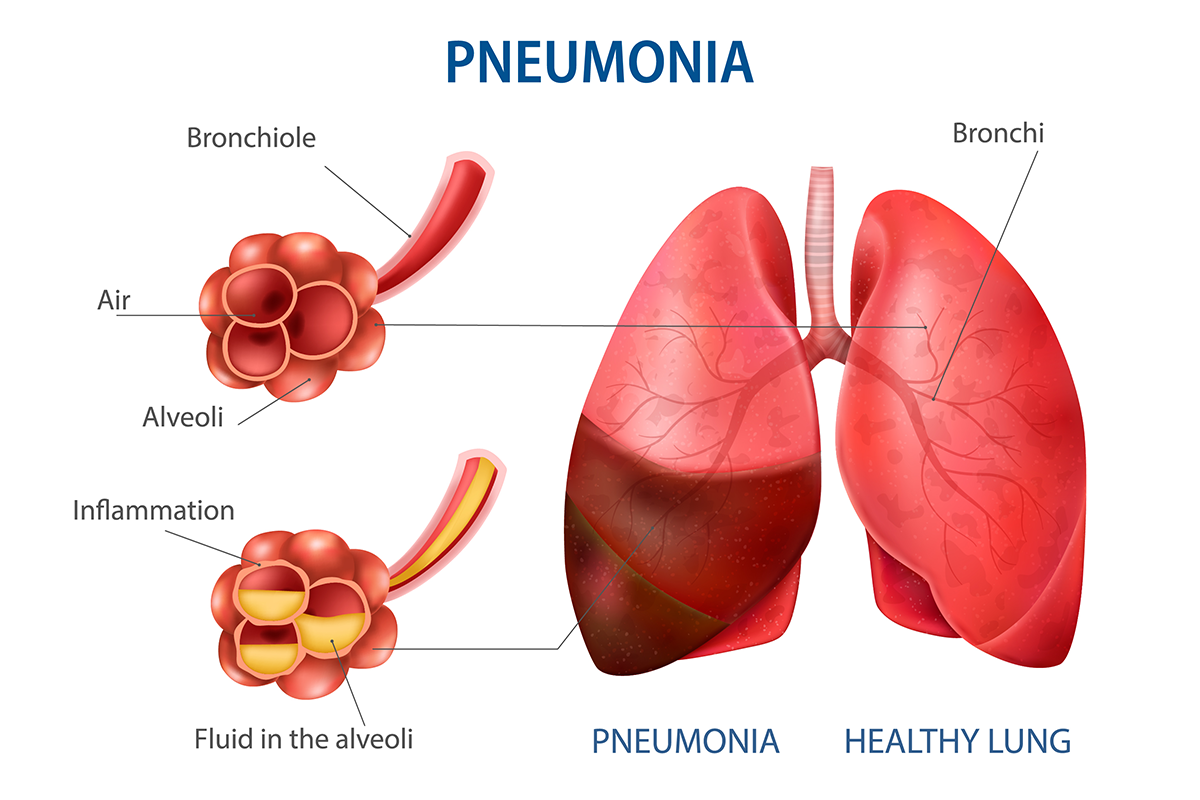

#What is Pneumonia?
Pneumonia is an inflammatory condition of the lungs that primarily affects the small air sacs known as alveoli. Common symptoms include a combination of productive or dry cough, chest pain, fever, and difficulty breathing. The severity of this condition can vary.

Pneumonia is usually caused by viral or bacterial infections, and less commonly by other microorganisms, certain medications, or autoimmune diseases. Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, impaired coughing ability (such as after a stroke), and a weakened immune system.

Diagnosis is often based on symptoms and physical examination. Chest X-rays, blood tests, and sputum cultures can help confirm the diagnosis. The disease can be classified based on the source of transmission, such as community-acquired pneumonia or hospital- or healthcare-acquired pneumonia.

In this project, we will perform pneumonia detection using the following dataset as part of our final exam for the Deep Learning course.

# Dataset Information: :

This dataset was obtained from the website https://data.mendeley.com/datasets/rscbjbr9sj/2

The dataset is organized into three folders: training, testing, and validation, each containing subfolders for the two image categories (Pneumonia/Normal). It includes a total of 5,863 chest X-ray images in JPEG format, divided into two categories: Pneumonia and Normal.

The chest X-ray images (anterior-posterior view) were selected from retrospective data of pediatric patients aged one to five years at the Guangzhou Women and Children's Medical Center in Guangzhou. All X-ray imaging was performed as part of the patients routine clinical care.

For the analysis of chest X-ray images, all radiographs were initially screened for quality control by removing unreadable or low-quality images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [ ]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

# Importing the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

Using TensorFlow backend.


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [ ]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



# Data Visualization & Preprocessing

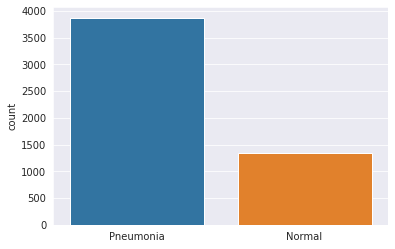

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

**Since the data appears to be imbalanced, i will apply data augmentation techniques to increase the amount of training data..**


**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

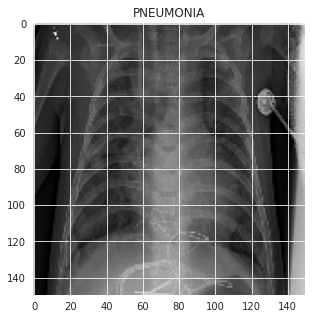

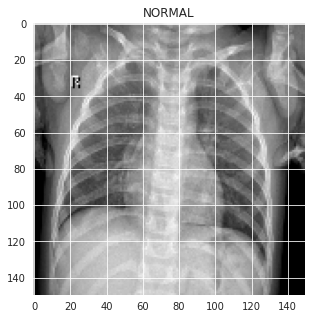

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

**Saya melakukan normalisasi grayscale normalization untuk mengurangi pengaruh perbedaan pencahayaan. Selain itu, CNN (Convolutional Neural Network) cenderung lebih cepat konvergen pada data dengan rentang [0..1] dibandingkan dengan [0..255]..**

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
# resize data for deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Data Augmentation
**To prevent overfitting, i need to artificially expand the dataset. This can be done by applying small transformations to the existing training data to simulate various possible variations.

This technique is known as data augmentation, which involves altering the appearance of the data without changing its label and only modifying the array representation while keeping the label intact.

Some commonly used augmentation techniques include:

*   Conversion to grayscale
*   Horizontal and vertical flipping
*   Random cropping
*   color jitter
*   Translation (shifting the image)
*   Rotasi
*   And many more.

By applying just a few of these transformations to the training data, we can easily double or even multiply the size of the training set, resulting in a more robust model that is better equipped to handle new data variations.**

In [ ]:
# Dengan augmentasi data untuk mencegah overfitting dan menangani data yg tidak balance dalam dataset.

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip=False)


datagen.fit(x_train)

For the data augmentation process, I chose to apply the following techniques:

1. Randomly rotate some training images by up to 30 degrees
2. Apply random zoom of up to 20% on selected training images
3. Randomly shift images horizontally by 10% of the image width
4. Randomly shift images vertically by 10% of the image height
5. Randomly flip images horizontally

Once the model is ready, we train it using the augmented training dataset.



# Training the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)       

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 246s 2s/step - loss: 0.4350 - accuracy: 0.8378 - val_loss: 22.6861 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 249s 2s/step - loss: 0.2729 - accuracy: 0.8938 - val_loss: 60.7846 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 241s 1s/step - loss: 0.2395 - accuracy: 0.9143 - val_loss: 88.1310 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
163/163 [==============================] - 239s 1s/step - loss: 0.1546 - accuracy: 0.9513 - val_loss: 65.1645 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 239s 1s/step - loss: 0.1495 - accuracy: 0.9530 - val_loss: 14.3722 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 6/12
163/163 [==============================] - 240s 1s/step - loss: 0.1116 - accuracy: 0.9599 - val_loss: 3.488

In [ ]:
# menampilkan performa model
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

624/624 [==============================] - 7s 12ms/step
Loss of the model is -  0.28208021704967207
624/624 [==============================] - 8s 13ms/step
Accuracy of the model is -  92.78846383094788 %


# Analysis after Model Training

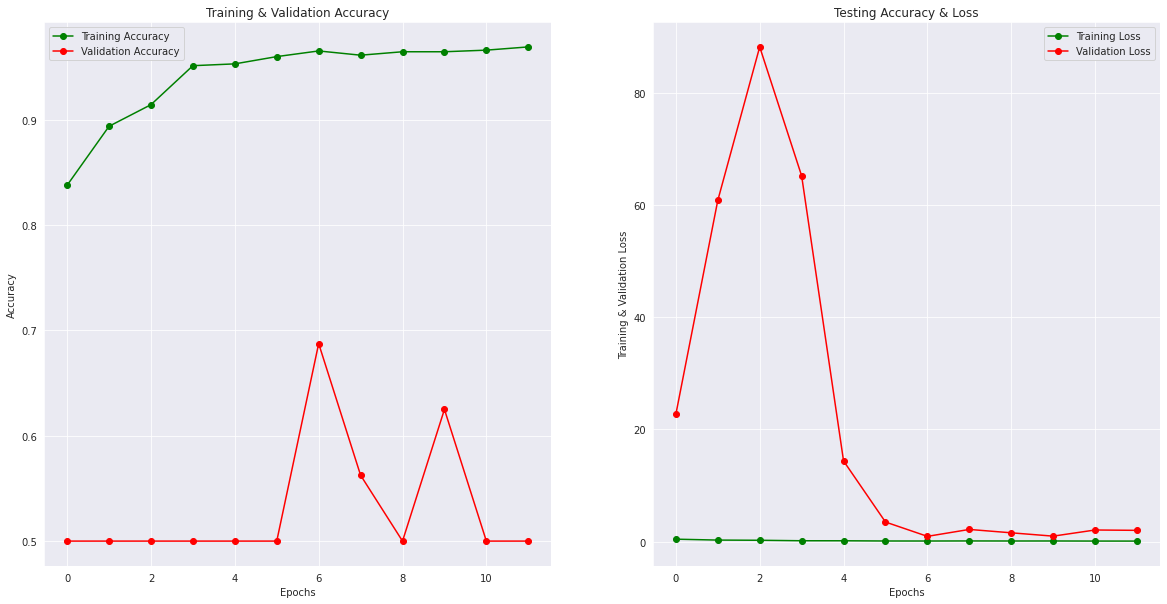

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')  # garis hijau dengan titik
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')  # garis merah dengan titik
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')  # garis hijau
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')  # garis merah
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.93      0.95      0.94       390
   Normal (Class 1)       0.92      0.88      0.90       234

           accuracy                           0.93       624
          macro avg       0.93      0.92      0.92       624
       weighted avg       0.93      0.93      0.93       624



In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[372,  18],
       [ 27, 207]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

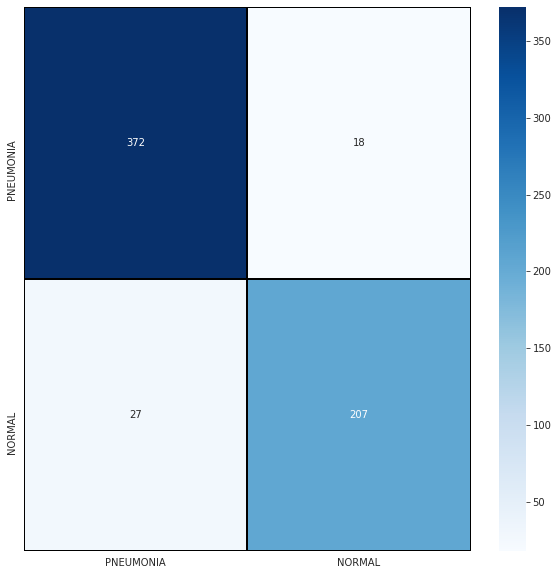

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes**

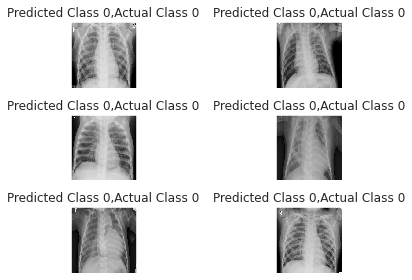

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

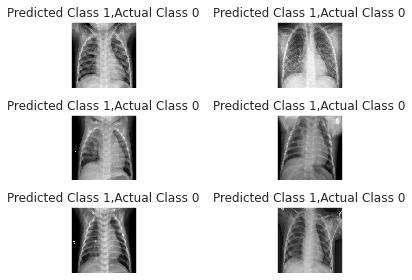

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

#Conclusion

The CNN-based pneumonia detection model has demonstrated strong performance in classifying chest X-ray images into Pneumonia and Normal categories. With an overall accuracy of 92.6%, the model shows high reliability in medical image classification tasks. The precision and recall scores for both classes indicate that the model is capable of identifying pneumonia cases with minimal false positives and false negatives.

Specifically, the model achieved a precision of 0.93 and recall of 0.95 for pneumonia cases, and a precision of 0.92 and recall of 0.88 for normal cases. The F1-scores of 0.94 and 0.90 respectively reflect a balanced and effective classification. The confusion matrix further confirms that the model correctly classified the majority of samples, with only a small number of misclassifications.

These results suggest that the model is well-suited for assisting in the early detection of pneumonia, especially in clinical settings where rapid and accurate diagnosis is critical. With further validation and integration, this approach could contribute to improving diagnostic workflows and patient outcomes.